<a href="https://colab.research.google.com/github/Nidjay78/LLM-Assisted-LSTM-Model/blob/main/LSTM_Stock_Tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
google_stock_data = pd.read_csv('GOOGL.csv')
google_stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [ ]:
google_stock_data = google_stock_data[['Date','Open','Close']] # Extracting required columns
google_stock_data['Date'] = pd.to_datetime(google_stock_data['Date'].apply(lambda x: x.split()[0])) # Selecting only date
google_stock_data.set_index('Date',drop=True,inplace=True) # Setting date column as index
google_stock_data.head()

<ipython-input-5-14d79f048b8a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_stock_data['Date'] = pd.to_datetime(google_stock_data['Date'].apply(lambda x: x.split()[0])) # Selecting only date


,Open,Close
Date,,
2004-08-19,50.050049,50.220219
2004-08-20,50.555557,54.209209
2004-08-23,55.430431,54.754753
2004-08-24,55.675674,52.487488
2004-08-25,52.532532,53.053055


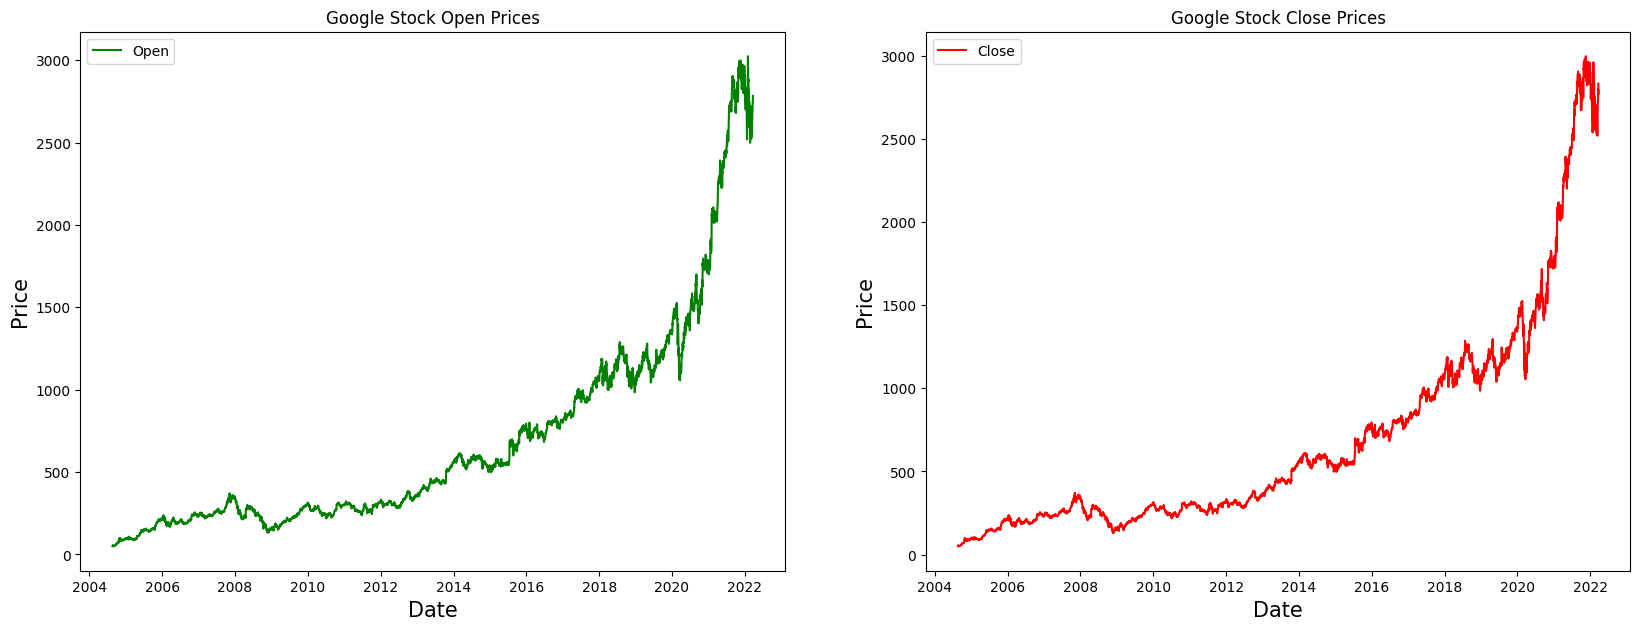

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

# Plotting 'Open' prices on the first subplot
ax1.plot(google_stock_data.index, google_stock_data['Open'], color='green', label='Open')
ax1.set_title('Google Stock Open Prices')
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Price', fontsize=15)
ax1.legend()

# Plotting 'Close' prices on the second subplot
ax2.plot(google_stock_data.index, google_stock_data['Close'], color='red', label='Close')
ax2.set_title('Google Stock Close Prices')
ax2.set_xlabel('Date', fontsize=15)
ax2.set_ylabel('Price', fontsize=15)
ax2.legend()

# Display the plots
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
google_stock_data[google_stock_data.columns] = MMS.fit_transform(google_stock_data)

In [ ]:
training_size = round(len(google_stock_data) * 0.80)
training_size
train_data = google_stock_data[:training_size]
test_data  = google_stock_data[training_size:]

train_data.shape, test_data.shape


((3545, 2), (886, 2))

In [ ]:
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))


In [ ]:
train_arr, train_label = create_sequence(train_data)
test_arr, test_label = create_sequence(test_data)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_arr.shape[1], train_arr.shape[2])))

model.add(Dropout(0.1))
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 50, 50)            10600     
                                                                 
 dropout_3 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(train_arr, train_label, epochs=80,validation_data=(test_arr, test_label), verbose=1)

Epoch 1/80
110/110 [==============================] - 7s 15ms/step - loss: 0.0011 - mean_absolute_error: 0.0155 - val_loss: 0.0026 - val_mean_absolute_error: 0.0349
Epoch 2/80
110/110 [==============================] - 1s 8ms/step - loss: 6.0335e-05 - mean_absolute_error: 0.0054 - val_loss: 0.0040 - val_mean_absolute_error: 0.0439
Epoch 3/80
110/110 [==============================] - 1s 9ms/step - loss: 6.1448e-05 - mean_absolute_error: 0.0055 - val_loss: 0.0047 - val_mean_absolute_error: 0.0499
Epoch 4/80
110/110 [==============================] - 1s 9ms/step - loss: 5.7818e-05 - mean_absolute_error: 0.0053 - val_loss: 0.0041 - val_mean_absolute_error: 0.0458
Epoch 5/80
110/110 [==============================] - 1s 8ms/step - loss: 5.8872e-05 - mean_absolute_error: 0.0054 - val_loss: 0.0026 - val_mean_absolute_error: 0.0354
Epoch 6/80
110/110 [==============================] - 1s 8ms/step - loss: 6.0438e-05 - mean_absolute_error: 0.0055 - val_loss: 0.0037 - val_mean_absolute_error: 0.

27/27 [==============================] - 1s 4ms/step


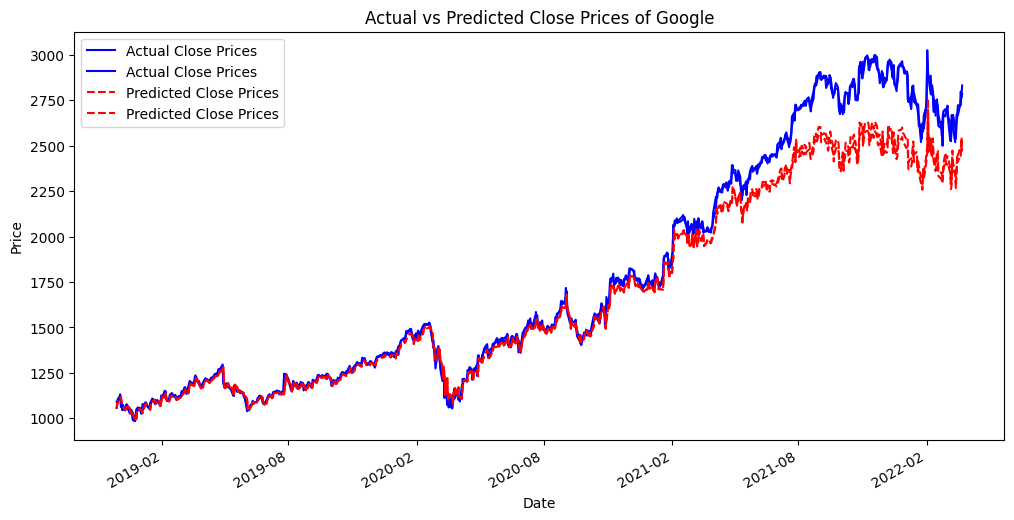

In [ ]:
import matplotlib.dates as mdates
test_predicted = model.predict(test_arr)

test_inverse_predicted = MMS.inverse_transform(test_predicted)


actual_close_prices = MMS.inverse_transform(test_label)

test_dates = test_data.index[-len(test_predicted):]

plt.figure(figsize=(12, 6))
plt.plot(test_dates, actual_close_prices, color='blue', label='Actual Close Prices')
plt.plot(test_dates, test_inverse_predicted, color='red', linestyle='--', label='Predicted Close Prices')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))

plt.gcf().autofmt_xdate()

plt.title('Actual vs Predicted Close Prices of Google')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
import numpy as np

# Calculate the Mean Squared Error
mse = np.mean((actual_close_prices - test_inverse_predicted) ** 2)

# Calculate the Root Mean Squared Error
rmse = np.sqrt(mse)

print("RMSE:", rmse)
average_price = np.mean(actual_close_prices)
rmse_normalized = (rmse / average_price) * 100  # RMSE as a percentage of the average price
print("Normalized RMSE (% of Average Price):", rmse_normalized)


RMSE: 154.2462303925353
Normalized RMSE (% of Average Price): 8.72659313262897


### Predicting on Tesla

In [ ]:
tesla_data = pd.read_csv('TSLA.csv')
tesla_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [ ]:
def create_sequences(data, sequence_length):
    xs = []
    ys = []
    for i in range(len(data) - sequence_length):
        x = data[i:(i + sequence_length)]
        y = data[i + sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Select the 'Close' column and normalize
close_prices = tesla_data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = scaler.fit_transform(close_prices)

# Define the sequence length (number of days to consider)
sequence_length = 60  # Using last 60 days to predict the next day

# Create sequences
X, y = create_sequences(scaled_close, sequence_length)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape data for LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
model1 = Sequential()
model1.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model1.add(Dropout(0.2))
model1.add(LSTM(units=50))
model1.add(Dropout(0.2))
model1.add(Dense(units=1))

# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model1.fit(X_train, y_train, epochs=80, batch_size=32)

Epoch 1/80
71/71 [==============================] - 4s 9ms/step - loss: 8.4638e-05
Epoch 2/80
71/71 [==============================] - 1s 7ms/step - loss: 1.4493e-05
Epoch 3/80
71/71 [==============================] - 1s 7ms/step - loss: 1.4090e-05
Epoch 4/80
71/71 [==============================] - 1s 7ms/step - loss: 1.2705e-05
Epoch 5/80
71/71 [==============================] - 1s 7ms/step - loss: 1.0553e-05
Epoch 6/80
71/71 [==============================] - 1s 7ms/step - loss: 9.8338e-06
Epoch 7/80
71/71 [==============================] - 1s 9ms/step - loss: 1.0261e-05
Epoch 8/80
71/71 [==============================] - 1s 10ms/step - loss: 8.7526e-06
Epoch 9/80
71/71 [==============================] - 1s 10ms/step - loss: 8.9431e-06
Epoch 10/80
71/71 [==============================] - 1s 10ms/step - loss: 7.9569e-06
Epoch 11/80
71/71 [==============================] - 1s 8ms/step - loss: 8.2922e-06
Epoch 12/80
71/71 [==============================] - 1s 7ms/step - loss: 8.5866e-0

In [88]:
predictions = model1.predict(X_test)
predicted = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y_test)

18/18 [==============================] - 0s 4ms/step


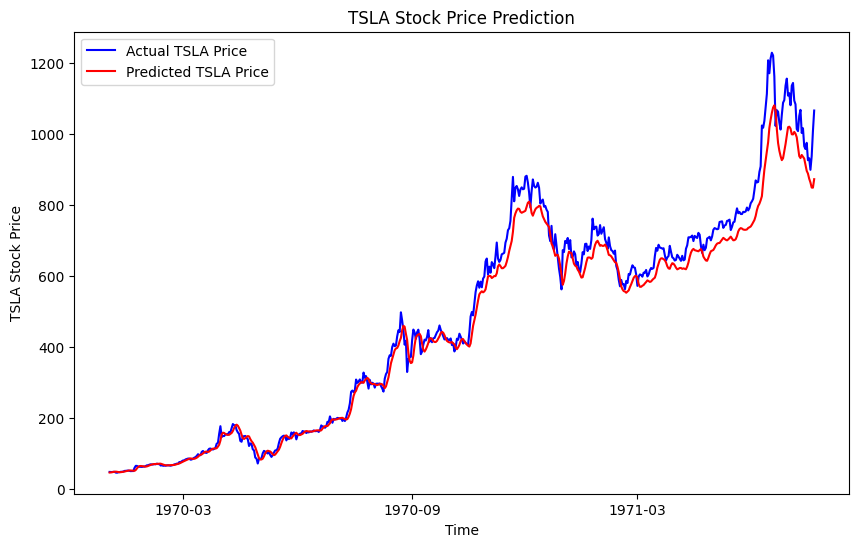

In [89]:
import matplotlib.dates as mdates

# Assuming 'tesla_data' is your original DataFrame
# Calculate the starting index for the test data
test_start_idx = len(tesla_data) - len(y_test)

# Extract the corresponding dates
test_dates = tesla_data['Date'][test_start_idx:].values

# Convert to pandas datetime for better handling

# Continue with your plotting code
plt.figure(figsize=(10, 6))
plt.plot(test_dates, actual, color='blue', label='Actual TSLA Price')
plt.plot(test_dates, predicted, color='red', label='Predicted TSLA Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.title('TSLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TSLA Stock Price')
plt.legend()
plt.show()


In [90]:
mse = np.mean((actual_prices - predicted_prices) ** 2)

# Calculate the Root Mean Squared Error
rmse = np.sqrt(mse)

print("RMSE:", rmse)
average_price = np.mean(actual_prices)
rmse_normalized = (rmse / average_price) * 100  # RMSE as a percentage of the average price
print("Normalized RMSE (% of Average Price):", rmse_normalized)


RMSE: 47.47967531236301
Normalized RMSE (% of Average Price): 10.013679018011771
